In [1]:
#导包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
#获取数据集
data = pd.read_csv('./Tesla.csv', date_parser = True)
data.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
8,7/12/2010,17.950001,18.070000,17.000000,17.049999,2202500,17.049999
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,2680100,18.139999


In [3]:
data.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000


In [4]:
#划分训练集
data_training = data[data['Date']<'2015-06-18'].copy()#此前的额数据用于训练
data_test = data[data['Date']>='2015-06-18'].copy()#此后的数据用于测试

In [5]:
data_test.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
data_training.head()

,Date,Open,High,Low,Close,Volume,Adj Close
66,10/1/2010,20.690001,20.750000,20.309999,20.600000,597700,20.600000
67,10/4/2010,20.430000,21.170000,20.299999,20.990000,643600,20.990000
68,10/5/2010,21.150000,21.280001,21.010000,21.120001,332000,21.120001
69,10/6/2010,21.059999,21.260000,20.320000,20.459999,313400,20.459999
70,10/7/2010,20.570000,20.639999,20.340000,20.430000,141000,20.430000


In [7]:
data.var()

Open         8.894362e+03
High         9.157517e+03
Low          8.622093e+03
Close        8.894977e+03
Volume       1.845537e+13
Adj Close    8.894977e+03
dtype: float64

In [8]:
#删除两列不用于训练的数据
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [9]:
#数据处理，
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training[0:5]

array([[0.00203729, 0.00175957, 0.00119871, 0.00210785, 0.014716  ],
       [0.00103786, 0.00333196, 0.00116004, 0.0036025 , 0.01612557],
       [0.0038055 , 0.00374378, 0.00390549, 0.00410072, 0.00655648],
       [0.00345954, 0.0036689 , 0.00123738, 0.0015713 , 0.00598528],
       [0.00157601, 0.00134775, 0.00131472, 0.00145633, 0.00069096]])

In [10]:
X_train = []
y_train = []

In [11]:
#将数据集录入输入矩阵
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print(X_train.shape)
print(y_train.shape)

(660, 60, 5)
(660,)


In [14]:
#导包建立LSTM网络
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
model = Sequential()

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [16]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
21/21 [==============================] - 12s 195ms/step - loss: 0.1218
Epoch 2/10
21/21 [==============================] - 4s 175ms/step - loss: 0.0223
Epoch 3/10
21/21 [==============================] - 4s 176ms/step - loss: 0.0141
Epoch 4/10
21/21 [==============================] - 4s 179ms/step - loss: 0.0114
Epoch 5/10
21/21 [==============================] - 4s 176ms/step - loss: 0.0114
Epoch 6/10
21/21 [==============================] - 4s 176ms/step - loss: 0.0112
Epoch 7/10
21/21 [==============================] - 4s 181ms/step - loss: 0.0099 2s
Epoch 8/10
21/21 [==============================] - 4s 180ms/step - loss: 0.0101
Epoch 9/10
21/21 [==============================] - 4s 179ms/step - loss: 0.0089
Epoch 10/10
21/21 [==============================] - 4s 180ms/step - loss: 0.0085


In [18]:
data_test.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [19]:
data_training = data[data['Date']<'2015-06-18'].copy()

past_60_days = data_training.tail(60)
#设置测试集
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,188.250000,188.529999,181.000000,181.880005,5126400
1,182.880005,184.880005,180.000000,181.470001,4042300
2,182.509995,188.889999,182.509995,186.800003,4072200
3,185.520004,186.580002,182.679993,185.850006,3391600
4,186.149994,193.399994,185.000000,193.149994,5461900


In [20]:
#对测试集进行标准化
inputs = scaler.transform(df)
inputs

array([[0.64612724, 0.62989027, 0.6225591 , 0.62020465, 0.15379017],
       [0.62548532, 0.61622551, 0.61869228, 0.61863333, 0.12049799],
       [0.62406303, 0.63123803, 0.62839799, 0.63906027, 0.1214162 ],
       ...,
       [0.91039785, 0.9012017 , 0.90588151, 0.9032307 , 0.14427636],
       [0.93115509, 0.91898464, 0.92440359, 0.92745172, 0.21441075],
       [0.93730541, 0.9174122 , 0.93267865, 0.92534392, 0.19523266]])

In [21]:
X_test = []
y_test = []
#输入
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [22]:
#查看测试集大小
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((972, 60, 5), (972,))

In [23]:
y_pred = model.predict(X_test)

In [24]:
#获取缩放比例
scaler.scale_

array([3.84393622e-03, 3.74377578e-03, 3.86682672e-03, 3.83244531e-03,
       3.07095126e-08])

In [25]:
scale = 1/3.84393622e-03
scale

260.14999801427507

In [26]:
#将预测结果转为正常大小
y_pred = y_pred*scale
y_test = y_test*scale

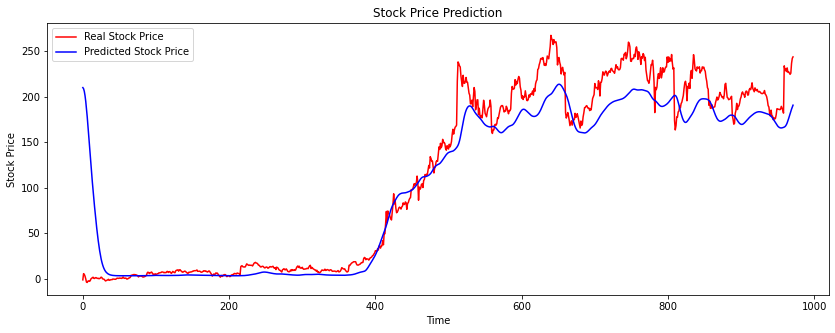

In [27]:
#将结果可视化
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()